## Generating the three data point part(a)

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False 
#generate a data set of 20. 
#for simplicity, 10 in the first quadrant, another 10 in the third quadrant 
X1_positive = []
X2_positive = []
X1_negative = []
X2_negative = []

for i in range(3):
    X1_positive.append(random.uniform(0,1))
    X2_positive.append(random.uniform(0,1))
    X1_negative.append(random.uniform(-1,0))
    X2_negative.append(random.uniform(-1,0))
    
#label the data
data1 = [np.array([X1_positive[i],X2_positive[i],1]) for i in range(3)]
data2 = [np.array([X2_negative[i],X2_negative[i],-1]) for i in range(3)]
data = data1 + data2

#data1_PLA = [np.array([1,X1_positive[i],X2_positive[i],1]) for i in range(3)]
#data2_PLA = [np.array([1,X1_negative[i],X2_negative[i],-1]) for i in range(3)]
#data_PLA = data1_PLA + data2_PLA

## Plotting the three data points

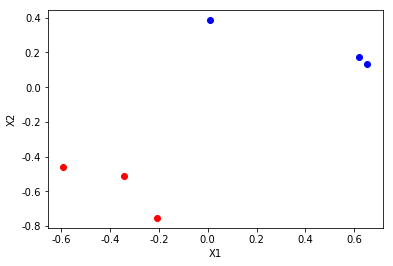

In [2]:

plt.plot(X1_positive, X2_positive, 'bo')
plt.plot(X1_negative, X2_negative, 'ro')
x = np.linspace(-1,1)
plt.xlabel("X1");
plt.ylabel("X2");
plt.show()

## getRandomSeparator function to get random linear horizontal separator hypothesis

In [3]:
def getRandomSeparator(data):
    X2 = np.array(data)[:,1:2]
    y = np.array(data)[:,2:3]
    flag = False
    while flag == False:
        a_random = random.uniform(-1,1)
        count = 0
        for i in range(len(X2)):
            if np.sign(X2[i]-a_random)*y[i] == 1:
                count += 1
        if count == 6:
            flag = True
                
    #print("Got random separator at a_random = ", a_random)
    return a_random
        

## Calling the function to get a_random -- Part(b) and plotting it 

In [4]:
a_random = getRandomSeparator(data)
print(a_random)

-0.4190329825473833


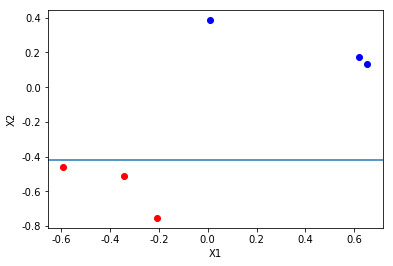

In [5]:
#Part b plotting target function f and hypothesis g of the Problem 1.4 from the HW - 1
plt.plot(X1_positive, X2_positive, 'bo')
plt.plot(X1_negative, X2_negative, 'ro')
x = np.linspace(-1,1)
plt.axhline(a_random)
plt.xlabel("X1");
plt.ylabel("X2");
plt.show()

## calculateDistance - function to calulate perpendicular distance from the random line
## checkForMarginSeparator - function to get distances for all datapoints from the random line
## getMaxMarginSeparatorForSVM - Get max margin separator for a_svm

In [6]:

def calculateDistance(X, a):
    #print(X)
    return abs(X[1]-a)

def checkForMarginSeparator(data):
    a = getRandomSeparator(data)
    dist = []
    for i in range(len(data)):
        dist.append(calculateDistance(data[i], a))
    #print(dist)
    minPosDist = min(dist[0:3])
    minNegDist = min(dist[3:6])
    #print(minPosDist)
    #print(minNegDist)
    return minPosDist, minNegDist, a

In [7]:
def getMaxMarginSeparatorForSVM(data):
    while True:
        minPosDist, minNegDist, a_svm = checkForMarginSeparator(data)
        #print(minPosDist - minNegDist)
        if abs(minPosDist - minNegDist) <= 0.0005:
            break
    #print(a_svm)
    return a_svm
        

## Calling the function to get a_svm -- Part(b) and plotting it

In [8]:
a_svm = getMaxMarginSeparatorForSVM(data)

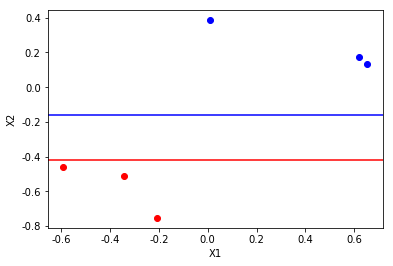

In [9]:
#Part b plotting target function f and hypothesis g of the Problem 1.4 from the HW - 1
plt.plot(X1_positive, X2_positive, 'bo')
plt.plot(X1_negative, X2_negative, 'ro')
x = np.linspace(-1,1)
plt.axhline(a_random,color='r')
plt.axhline(a_svm,color='b')
plt.xlabel("X1");
plt.ylabel("X2");
plt.show()

## Below function generates three points at random to be called million times

In [10]:
def generateRandomThreeDataPoints():
    X1_positive = []
    X2_positive = []
    X1_negative = []
    X2_negative = []
    
    for i in range(3):
        X1_positive.append(random.uniform(0,1))
        X2_positive.append(random.uniform(0,1))
        X1_negative.append(random.uniform(-1,0))
        X2_negative.append(random.uniform(-1,0))

    #label the data
    data1 = [np.array([X1_positive[i],X2_positive[i],1]) for i in range(3)]
    data2 = [np.array([X1_negative[i],X2_negative[i],-1]) for i in range(3)]
    data = data1 + data2
    return data
    

## Part (c) - To get million a_random

In [11]:
a_random_list = []
a_svm_list = []

for j in range(1,1000001):
    data1 = generateRandomThreeDataPoints()

    a_random_list.append(getRandomSeparator(data1))

## Part (d) - Plotting histogram for million 'a_random'

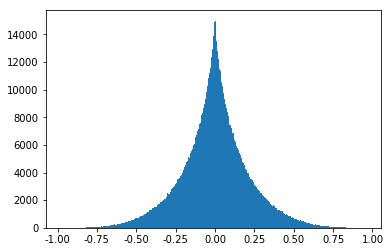

In [12]:
plt.hist(a_random_list, bins='auto')
plt.show()

In [13]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C = 1.0)

## Part (c) - To get million a_svm

In [14]:
a_svm_list = []
for j in range(1,1000001):
    data = generateRandomThreeDataPoints()
    
    X = np.array(data)[:,0:2]
    y = np.array(data)[:,2]
    
    #a_random.append(random.uniform(-1,1))
    clf.fit(X,y)
    W = clf.coef_[0]
    b = clf.intercept_[0]
    a_svm_list.append(-b)

## Part (d) - Plotting histogram for million 'a_svm'

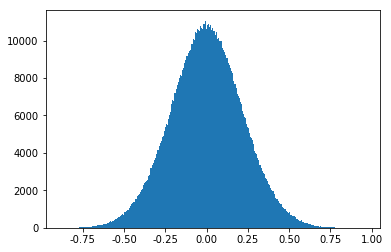

In [15]:
plt.hist(a_svm_list, bins='auto')
plt.show()